In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

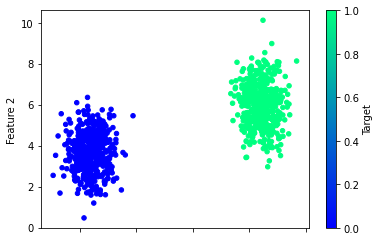

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [7]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))


In [8]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [9]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [11]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)


Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.7329 - accuracy: 0.4747
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7223 - accuracy: 0.3600
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7143 - accuracy: 0.0040
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7082 - accuracy: 0.0093
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7036 - accuracy: 0.0227
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7005 - accuracy: 0.0467
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6981 - accuracy: 0.0573
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6965 - accuracy: 0.0720
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.0840
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.1253
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.1079 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 3ms/step - loss: 0.1062 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1044 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 3ms/step - loss: 0.1027 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1011 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0994 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0978 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0963 - accuracy: 1.0000
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0948 - accuracy: 1.0000
Epoch 92/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0933 - accuracy: 1.0000
Epoch 93/100


<AxesSubplot:>

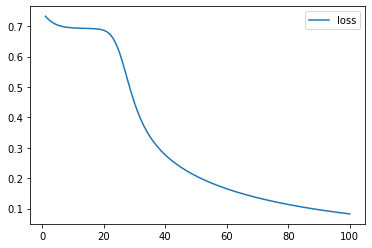

In [12]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

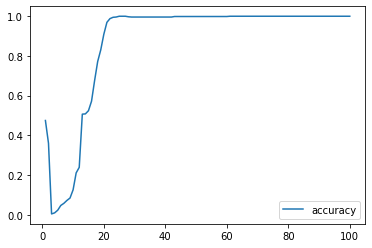

In [13]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [14]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0770 - accuracy: 1.0000 - 329ms/epoch - 41ms/step
Loss: 0.07703804224729538, Accuracy: 1.0


In [15]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

1/1 [==============================] - 0s 156ms/step


array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

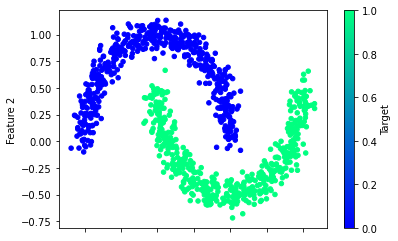

In [16]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")


In [17]:
# split our nonlinear data into training and testing datasets and normalize our datasets

# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [18]:
# our neural network model using the fit method on the nonlinear training data
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)


Epoch 1/100
24/24 [==============================] - 0s 2ms/step - loss: 1.1250 - accuracy: 0.4933
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8746 - accuracy: 0.5387
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7622 - accuracy: 0.5747
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7048 - accuracy: 0.5987
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6711 - accuracy: 0.6173
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6478 - accuracy: 0.6347
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6281 - accuracy: 0.6440
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6119 - accuracy: 0.6587
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5976 - accuracy: 0.6627
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5849 - accuracy: 0.6733
Epoch 11/

24/24 [==============================] - 0s 3ms/step - loss: 0.2690 - accuracy: 0.8920
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2687 - accuracy: 0.8920
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2683 - accuracy: 0.8920
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2678 - accuracy: 0.8920
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2674 - accuracy: 0.8933
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2671 - accuracy: 0.8933
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2668 - accuracy: 0.8933
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2664 - accuracy: 0.8933
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2661 - accuracy: 0.8933
Epoch 92/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2658 - accuracy: 0.8933
Epoch 93/100


<AxesSubplot:>

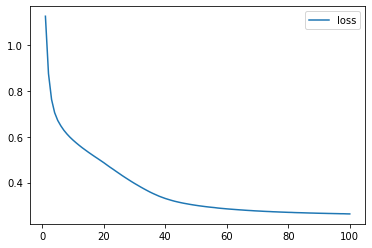

In [19]:
# plot out the loss and accuracy curves over our training iterations
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

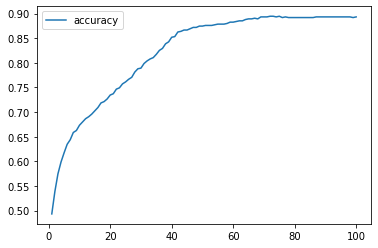

In [20]:
# Plot the accuracy
history_df.plot(y="accuracy")


In [21]:
# create a new Sequential model since we want to change the structure
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [22]:
# create a hidden layer with six neurons
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [23]:
# make direct comparisons with our single-neuron model

# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)


Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.7719 - accuracy: 0.5027
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7358 - accuracy: 0.5467
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7026 - accuracy: 0.6320
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6710 - accuracy: 0.6853
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6400 - accuracy: 0.7133
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6088 - accuracy: 0.7347
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5777 - accuracy: 0.7627
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5473 - accuracy: 0.7947
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5171 - accuracy: 0.8053
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4888 - accuracy: 0.8227
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.2408 - accuracy: 0.8987
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2406 - accuracy: 0.8987
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2403 - accuracy: 0.8987
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2402 - accuracy: 0.8987
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2399 - accuracy: 0.8973
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2397 - accuracy: 0.8973
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2395 - accuracy: 0.8987
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2393 - accuracy: 0.8987
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2390 - accuracy: 0.8973
Epoch 92/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2390 - accuracy: 0.8973
Epoch 93/100


# Practice Encoding Categorical Variables
one-hot encoding

In [24]:
# Import our dependencies
import pandas as pd
import sklearn as skl

# Read in our ramen data
ramen_df = pd.read_csv("ramen-ratings.csv")

# Print out the Country value counts
country_counts = ramen_df.Country.value_counts()
country_counts

Japan            352
USA              323
South Korea      309
Taiwan           224
Thailand         191
China            169
Malaysia         156
Hong Kong        137
Indonesia        126
Singapore        109
Vietnam          108
UK                69
Philippines       47
Canada            41
India             31
Germany           27
Mexico            25
Australia         22
Netherlands       15
Myanmar           14
Nepal             14
Pakistan           9
Hungary            9
Bangladesh         7
Colombia           6
Brazil             5
Cambodia           5
Fiji               4
Holland            4
Poland             4
Finland            3
Sarawak            3
Sweden             3
Dubai              3
Ghana              2
Estonia            2
Nigeria            1
United States      1
Name: Country, dtype: int64

<AxesSubplot:ylabel='Density'>

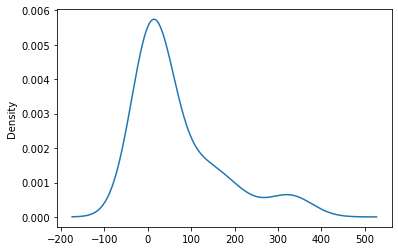

In [25]:

# Visualize the value counts to produce a density
country_counts.plot.density()

In [ ]:

# Determine which values to replace
replace_countries = list(country_counts[country_counts < 100].index)

# Replace in DataFrame
for country in replace_countries:
    ramen_df.Country = ramen_df.Country.replace(country,"Other")


# Check to make sure binning was successful
ramen_df.Country.value_counts()

In [26]:
# bucket any country that appears fewer than 100 times in the dataset as "other." 

# Determine which values to replace
replace_countries = list(country_counts[country_counts < 100].index)

# Replace in DataFrame
for country in replace_countries:
    ramen_df.Country = ramen_df.Country.replace(country,"Other")


# Check to make sure binning was successful
ramen_df.Country.value_counts()

Other          376
Japan          352
USA            323
South Korea    309
Taiwan         224
Thailand       191
China          169
Malaysia       156
Hong Kong      137
Indonesia      126
Singapore      109
Vietnam        108
Name: Country, dtype: int64

In [27]:
# ranspose the variable using one-hot encoding columns
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(ramen_df.Country.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['Country'])
encode_df.head()

C:\Users\colon\anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Country_China,Country_Hong Kong,Country_Indonesia,Country_Japan,Country_Malaysia,Country_Other,Country_Singapore,Country_South Korea,Country_Taiwan,Country_Thailand,Country_USA,Country_Vietnam
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
# Merge the two DataFrames together and drop the Country column
ramen_df.merge(encode_df,left_index=True,right_index=True).drop("Country",1)


C:\Users\colon\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,Review #,Brand,Variety,Style,Stars,Top Ten,Country_China,Country_Hong Kong,Country_Indonesia,Country_Japan,Country_Malaysia,Country_Other,Country_Singapore,Country_South Korea,Country_Taiwan,Country_Thailand,Country_USA,Country_Vietnam
0,2580,New Touch,T's Restaurant Tantanmen,Cup,3.75,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,2.25,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,2.75,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2576,Ching's Secret,Singapore Curry,Pack,3.75,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,3.5,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2577,3,Wai Wai,Tom Yum Shrimp,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


standardizing data

In [29]:
# Import our dependencies
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Read in our dataset
hr_df = pd.read_csv("hr_dataset.csv")
hr_df.head()

,Satisfaction_Level,Num_Projects,Time_Spent,Num_Promotions
0,0.30,1,253,2
1,0.25,1,200,0
2,0.90,4,2880,5
3,0.65,3,1450,3
4,0.50,2,785,2


In [30]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [31]:
# Fit the StandardScaler
scaler.fit(hr_df)

StandardScaler()

In [32]:
# Scale the data
scaled_data = scaler.transform(hr_df)

In [33]:
# Create a DataFrame with the scaled data
transformed_scaled_data = pd.DataFrame(scaled_data, columns=hr_df.columns)
transformed_scaled_data.head()

,Satisfaction_Level,Num_Projects,Time_Spent,Num_Promotions
0,-1.303615,-1.162476,-1.049481,-0.558656
1,-1.512945,-1.162476,-1.094603,-1.804887
2,1.208335,0.860233,1.187080,1.310692
3,0.161689,0.185996,-0.030385,0.064460
4,-0.466299,-0.488240,-0.596549,-0.558656


Real Data, Real Practice Imports and Setup

In [34]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import our input dataset
attrition_df = pd.read_csv('HR-Employee-Attrition.csv')
attrition_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Real Data, Real Practice Preprocessing

In [36]:
# make sure that none of the categorical variables have more than 10 unique values and require bucketing
# Check the number of unique values in each column
attrition_df[attrition_cat].nunique()


Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

In [37]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(attrition_df[attrition_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(attrition_cat)
encode_df.head()

C:\Users\colon\anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [38]:
# To replace these columns, we'll use a combination of Pandas' merge and drop methods.
# Merge one-hot encoded features and drop the originals
attrition_df = attrition_df.merge(encode_df,left_index=True, right_index=True)
attrition_df = attrition_df.drop(attrition_cat,1)
attrition_df.head()

C:\Users\colon\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,49,279,8,1,1,2,3,61,2,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,37,1373,2,2,1,4,4,92,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,33,1392,3,4,1,5,4,56,3,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,27,591,2,1,1,7,1,40,3,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [39]:
#  separate our features and target as well as perform our training/test split
#Split our preprocessed data into our features and target arrays
y = attrition_df["Attrition_Yes"].values
X = attrition_df.drop(["Attrition_Yes","Attrition_No"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

C:\Users\colon\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


In [40]:
# build our StandardScalerobject and standardize the numerical features

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [41]:
#create our deep learning model

# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 8)                 448       
                                                                 
 dense_6 (Dense)             (None, 5)                 45        
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 499
Trainable params: 499
Non-trainable params: 0
_________________________________________________________________


In [42]:
# compile our model and define the loss and accuracy metrics

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [43]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100)

Epoch 1/100
35/35 [==============================] - 1s 2ms/step - loss: 182.7364 - accuracy: 0.7949
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 66.6277 - accuracy: 0.7931
Epoch 3/100
35/35 [==============================] - 0s 3ms/step - loss: 15.8973 - accuracy: 0.7559
Epoch 4/100
35/35 [==============================] - 0s 3ms/step - loss: 6.5025 - accuracy: 0.7250
Epoch 5/100
35/35 [==============================] - 0s 3ms/step - loss: 3.8932 - accuracy: 0.6987
Epoch 6/100
35/35 [==============================] - 0s 3ms/step - loss: 3.0772 - accuracy: 0.6851
Epoch 7/100
35/35 [==============================] - 0s 3ms/step - loss: 2.5434 - accuracy: 0.7123
Epoch 8/100
35/35 [==============================] - 0s 3ms/step - loss: 2.0559 - accuracy: 0.7087
Epoch 9/100
35/35 [==============================] - 0s 3ms/step - loss: 1.6679 - accuracy: 0.7114
Epoch 10/100
35/35 [==============================] - 0s 3ms/step - loss: 1.8221 - accuracy: 0.7169
Epoch

Epoch 83/100
35/35 [==============================] - 0s 3ms/step - loss: 0.5472 - accuracy: 0.8013
Epoch 84/100
35/35 [==============================] - 0s 3ms/step - loss: 0.6520 - accuracy: 0.7795
Epoch 85/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5752 - accuracy: 0.7895
Epoch 86/100
35/35 [==============================] - 0s 2ms/step - loss: 0.6603 - accuracy: 0.7877
Epoch 87/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5409 - accuracy: 0.8013
Epoch 88/100
35/35 [==============================] - 0s 3ms/step - loss: 0.4925 - accuracy: 0.8085
Epoch 89/100
35/35 [==============================] - 0s 3ms/step - loss: 0.5533 - accuracy: 0.8004
Epoch 90/100
35/35 [==============================] - 0s 3ms/step - loss: 0.4952 - accuracy: 0.8049
Epoch 91/100
35/35 [==============================] - 0s 3ms/step - loss: 0.4801 - accuracy: 0.8067
Epoch 92/100
35/35 [==============================] - 0s 3ms/step - loss: 0.6072 - accuracy: 0.7895


In [44]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

12/12 - 0s - loss: 0.4818 - accuracy: 0.8424 - 235ms/epoch - 20ms/step
Loss: 0.4818025529384613, Accuracy: 0.842391312122345
